In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
filepath = 'C:/Users/schuy/Documents/datasets/iris.txt'
df = pd.read_csv(filepath)
cols = df.columns
df_map = {col:df[col] for col in cols[:-1]}

Text(291.2335858585858, 0.5, 'x3')

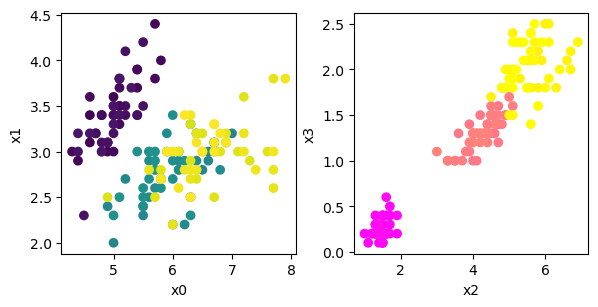

In [3]:
x0 = df_map[cols[0]]
x1 = df_map[cols[1]]
x2 = df_map[cols[2]]
x3 = df_map[cols[3]]

k0 = np.linspace(45,55,50)
k1 = np.linspace(120,130,50)
k2 = np.linspace(200,210,50)
K = np.vstack((k0,k1,k2))

fig, ax = plt.subplots(1,2,figsize=(6,3))
fig.tight_layout()
ax[0].scatter(x0,x1,c=K)
ax[1].scatter(x2,x3,c=K,cmap='spring')
ax[0].set_xlabel('x0')
ax[0].set_ylabel('x1')
ax[1].set_xlabel('x2')
ax[1].set_ylabel('x3')

In [4]:
# Partitioning dataset into train, test data
C0_x0_train = x0[:40]
C0_x1_train = x1[:40]
C0_x0_test = x0[40:50]
C0_x1_test = x1[40:50]

C1_x0_train = x0[50:90]
C1_x1_train = x1[50:90]
C1_x0_test = x0[90:100]
C1_x1_test = x1[90:100]

C2_x0_train = x0[100:140]
C2_x1_train = x1[100:140]
C2_x0_test = x0[140:150]
C2_x1_test = x1[140:150]

C0_X_test = np.vstack((C0_x0_test,C0_x1_test))
C1_X_test = np.vstack((C1_x0_test,C1_x1_test))
C2_X_test = np.vstack((C2_x0_test,C2_x1_test))

#### Closed form matrix solution 

In [6]:
# Multidimensional classification

#X = np.vstack(df.values[:,:-1]).astype('float64')
X = np.vstack((np.vstack((C0_x0_train, C0_x1_train)).T,np.vstack((C1_x0_train, C1_x1_train)).T,
               np.vstack((C2_x0_train, C2_x1_train)).T))
Y = df.values[:,-1]
y0 = -1*np.ones((50,))
y1 = 0*np.ones((50,))
y2 = 1*np.ones((50,))
T = np.vstack((y0[:40],y1[:40],y2[:40])).flatten()
pinv = np.linalg.inv(X.T@X)@X.T
W_multi = pinv@T

print('C0 classification:', W_multi@C0_X_test)
print('C1 classification:', W_multi@C1_X_test)
print('C2 classification:', W_multi@C2_X_test)

print('C0 classification mean:', np.mean(W_multi@C0_X_test))
print('C1 classification mean:', np.mean(W_multi@C1_X_test))
print('C2 classification mean:', np.mean(W_multi@C2_X_test))


C0 classification: [-0.88389517  0.052176   -0.89750045 -0.88389517 -1.13094575 -0.48952125
 -1.13094575 -0.7932381  -0.92695615 -0.68444066]
C1 classification: [ 0.27430597  0.188184    0.43069949  0.31283186  0.22670989 -0.02034069
  0.07938656  0.34004243  0.16550853  0.17911381]
C2 classification: [ 0.40124379  0.50550614  0.33097224  0.35364771  0.20178929  0.50097104
  0.79108261  0.3967087  -0.15859383  0.08392166]
C0 classification mean: -0.7769162455520997
C1 classification mean: 0.21764418751764744
C2 classification mean: 0.34072493471130194


In [7]:
W_multi.shape

(2,)

In [7]:
# Binary classification test
### Seems to work
### y \in {-1, +1}

X = np.vstack((np.vstack((C0_x0_train, C0_x1_train)).T,np.vstack((C1_x0_train, C1_x1_train)).T))
Y = np.vstack((-1*np.ones((40,)), 1*np.ones((40,)))).flatten()
pinv = np.linalg.inv(X.T@X)@X.T
W = pinv@Y

In [8]:
C0_X_test = np.vstack((C0_x0_test,C0_x1_test))
C1_X_test = np.vstack((C1_x0_test,C1_x1_test))
print('C0 classification:', W@C0_X_test)
print('C1 classification:', W@C1_X_test)

C0 classification: [-0.9208675   0.32599627 -0.97339075 -0.9208675  -1.25175393 -0.39495077
 -1.25175393 -0.82002688 -0.96253394 -0.64915526]
C1 classification: [0.68524725 0.60191438 0.91529306 0.70940594 0.62607307 0.29518664
 0.43104276 0.81445243 0.51437564 0.56689888]


#### Gradient descent solution

In [4]:
w_0 = np.array([0,0,0,0])

X = df.values[:,:-1].astype('float64')
y0 = -1*np.ones((50,))
y1 = 0*np.ones((50,))
y2 = 1*np.ones((50,))
t = np.vstack((y0,y1,y2)).flatten()

eta = 1e-5
gradE = X.T@(X@w_0 - t)
w_1 = w_0 - eta*gradE 

In [9]:
w_k0 =  np.array([0,0,0,0])
for k in range(100000):
    w_k =  w_k0 - eta*(X.T@(X@w_k0 - t))
    w_k0 = w_k
    if k % 10000 == 0:
        print('iteration {}'.format(k))
        print(w_k0)

iteration 0
[ 0.000791 -0.000222  0.002044  0.000891]
iteration 10000
[-0.24445986 -0.12161262  0.34954856  0.41102059]
iteration 20000
[-0.263919   -0.08718289  0.32045823  0.50911966]
iteration 30000
[-0.26063171 -0.08591526  0.29816273  0.55969299]
iteration 40000
[-0.2532332  -0.09190303  0.28194143  0.5897178 ]
iteration 50000
[-0.24650822 -0.09817387  0.27037781  0.6091596 ]
iteration 60000
[-0.24132529 -0.10319888  0.26220357  0.62232267]
iteration 70000
[-0.23754649 -0.10691508  0.25644568  0.63142161]
iteration 80000
[-0.23485042 -0.10958168  0.25239594  0.63776944]
iteration 90000
[-0.23294391 -0.11147185  0.24954944  0.64221571]


In [11]:
X_C0 = df.values[10:20,:-1]
X_C1 = df.values[80:90,:-1]
X_C2 = df.values[120:130,:-1]
print('classification C0:', X_C0@w_k0)
print('classification C1:', X_C1@w_k0)
print('classification C2:', X_C2@w_k0)

print('classification C0 mean:', np.mean(X_C0@w_k0))
print('classification C1 mean:', np.mean(X_C1@w_k0))
print('classification C2 mean:', np.mean(X_C2@w_k0))

classification C0: [-1.167631029616329 -0.9700741511091701 -1.038995667279623
 -0.9974600423246891 -1.3683776094819087 -1.1870075500149146
 -1.11063481562043 -1.035811248775559 -1.134348370580749
 -1.0448977179540404]
classification C1: [0.1060202264138318 0.016731771613572866 0.09198700737127041
 0.6008601629836807 0.49291613492967934 0.37336724177145486
 0.23006439337767115 0.20961665419738595 0.2185091699856122
 0.273316666563025]
classification C2: [0.9362812636868381 0.8908442316655667 0.8500712784025031
 0.6109370503933826 0.8422539399785451 0.6183982376006358
 0.5980617302628479 0.6234158190319736 0.9433816135485218
 0.4623822669027673]
classification C0 mean: -1.1055238202757411
classification C1 mean: 0.26133894292071846
classification C2 mean: 0.7376027431473582


In [14]:
### Including bias component in w, x: i.e. (w,x)=\sum_{j=0}w_jx_j = (w0,1)+(w_{j=1}^{j=4},x_{j=1}^{j=4})
x0 = np.expand_dims(np.ones((150,)), axis=1)
X_bias = np.hstack((x0,X))
w_0_bias = np.array([0,0,0,0,0])
y0 = -1*np.ones((50,))
y1 = 0*np.ones((50,))
y2 = 1*np.ones((50,))
t = np.vstack((y0,y1,y2)).flatten()

eta = 1e-5
gradE_bias = X_bias.T@(X_bias@w_0_bias - t)
w_1_bias = w_0_bias - eta*gradE_bias 

In [15]:
w_k0_bias =  np.array([0,0,0,0,0])
for k in range(100000):
    w_k_bias =  w_k0_bias - eta*(X_bias.T@(X_bias@w_k0_bias - t))
    w_k0_bias = w_k_bias
    if k % 10000 == 0:
        print('iteration {}'.format(k))
        print(w_k0_bias)

iteration 0
[ 0.        0.000791 -0.000222  0.002044  0.000891]
iteration 10000
[-0.15099698 -0.22345528 -0.10676994  0.34633062  0.40576357]
iteration 20000
[-0.22396015 -0.23192739 -0.06614376  0.3156191   0.50002652]
iteration 30000
[-0.28673918 -0.21920192 -0.05954997  0.29199993  0.54716012]
iteration 40000
[-0.34208633 -0.20352059 -0.06080416  0.27465783  0.57409504]
iteration 50000
[-0.39131144 -0.18945662 -0.06283545  0.26212741  0.59075371]
iteration 60000
[-0.43523383 -0.17774275 -0.064059    0.2531105   0.60140829]
iteration 70000
[-0.47447573 -0.16813993 -0.06436735  0.24661331  0.6082476 ]
iteration 80000
[-0.50955699 -0.16024443 -0.06398011  0.24191201  0.61256203]
iteration 90000
[-0.54092913 -0.15369295 -0.06313449  0.23848929  0.61518037]


In [23]:
X_C0_bias = X_bias[10:20]
X_C1_bias = X_bias[80:90]
X_C2_bias = X_bias[120:130]

print('\n CLASSIFICATION W/ BIAS: \n')

print('classification C0:', X_C0_bias@w_k0_bias)
print('classification C1:', X_C1_bias@w_k0_bias)
print('classification C2:', X_C2_bias@w_k0_bias, '\n')

print('classification C0 mean:', np.mean(X_C0_bias@w_k0_bias))
print('classification C1 mean:', np.mean(X_C1_bias@w_k0_bias))
print('classification C2 mean:', np.mean(X_C2_bias@w_k0_bias))


 CLASSIFICATION W/ BIAS: 

classification C0: [-1.12142577 -0.99030348 -1.07435807 -1.07105219 -1.27010397 -1.08596584
 -1.05769325 -1.02649469 -1.06322563 -1.02150204]
classification C1: [ 0.0421195  -0.04314416  0.06431835  0.56451594  0.43157718  0.37951683
  0.27991271  0.19468088  0.18421442  0.2064451 ]
classification C2: [0.97337621 0.81706136 0.93060499 0.59619229 0.87348258 0.69138096
 0.5812126  0.60722686 0.92535302 0.53325709] 

classification C0 mean: -1.0782124928345074
classification C1 mean: 0.23041567665286342
classification C2 mean: 0.7529147951071418
